In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/POS AI/Perceptron_Datasets/bebidas.csv')
df_test = pd.read_csv('/content/drive/MyDrive/POS AI/Perceptron_Datasets/bebidasTestes.csv')

display(df.describe())

,x1,x2,x3,x4,d1,d2,d3
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.508730,0.536464,0.496789,0.449915,0.323077,0.346154,0.330769
std,0.221545,0.240517,0.219725,0.204357,0.469461,0.477583,0.472310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346075,0.366375,0.334725,0.303000,0.000000,0.000000,0.000000
50%,0.517700,0.521900,0.505800,0.447200,0.000000,0.000000,0.000000
75%,0.676325,0.721850,0.653500,0.612400,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
X_train = df.drop(['d1', 'd2', 'd3'], axis=1)
Y_train = df[['d1', 'd2', 'd3']]

X_test = df_test.drop(['d1', 'd2', 'd3'], axis=1)
Y_test = df_test[['d1', 'd2', 'd3']]

<Axes: >

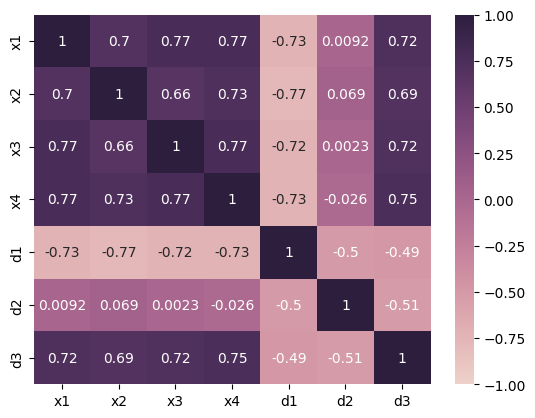

In [4]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), vmin=-1, vmax=1)

<Axes: >

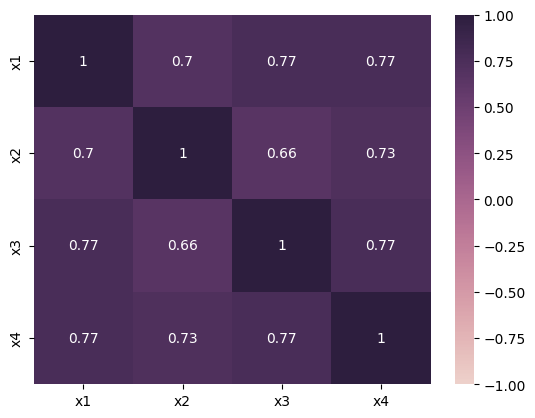

In [5]:
sns.heatmap(X_train.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), vmin=-1, vmax=1)

In [6]:
from sklearn.model_selection import GridSearchCV

pip_mlp_5n = Pipeline([
    ('mlp_5n', MLPClassifier(hidden_layer_sizes=(5), activation='logistic', learning_rate_init=0.001, epsilon=0.000001, max_iter=5000))
])

pip_mlp_10n = Pipeline([
    ('mlp_10n', MLPClassifier(hidden_layer_sizes=(10), activation='logistic', learning_rate_init=0.001, epsilon=0.000001, max_iter=5000))
])

pip_mlp_15n = Pipeline([
    ('mlp_15n', MLPClassifier(hidden_layer_sizes=(15), activation='logistic', learning_rate_init=0.001, epsilon=0.000001, max_iter=5000))
])

pip_mlp_5n.fit(X_train, Y_train)
pip_mlp_10n.fit(X_train, Y_train)
pip_mlp_15n.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('mlp_15n',
                 MLPClassifier(activation='logistic', epsilon=1e-06,
                               hidden_layer_sizes=15, max_iter=5000))])

In [7]:
scores = cross_val_score(pip_mlp_5n, X_train, Y_train, cv=5)
print("Resultados da validação cruzada do conjunto completo de dados:")
print(scores)
print("Média: ", np.mean(scores))
print("Desvio Padrão: ", np.std(scores))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Resultados da validação cruzada do conjunto completo de dados:
[0.92307692 0.80769231 0.96153846 0.88461538 0.96153846]
Média:  0.9076923076923077
Desvio Padrão:  0.057563959796522186


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
scores = cross_val_score(pip_mlp_10n, X_train, Y_train, cv=5)
print("Resultados da validação cruzada do conjunto completo de dados:")
print(scores)
print("Média: ", np.mean(scores))
print("Desvio Padrão: ", np.std(scores))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Resultados da validação cruzada do conjunto completo de dados:
[0.92307692 0.84615385 0.96153846 0.88461538 0.96153846]
Média:  0.9153846153846154
Desvio Padrão:  0.044853476114194636


In [9]:
scores = cross_val_score(pip_mlp_15n, X_train, Y_train, cv=5)
print("Resultados da validação cruzada do conjunto completo de dados:")
print(scores)
print("Média: ", np.mean(scores))
print("Desvio Padrão: ", np.std(scores))

Resultados da validação cruzada do conjunto completo de dados:
[0.92307692 0.88461538 0.96153846 0.88461538 0.96153846]
Média:  0.923076923076923
Desvio Padrão:  0.0344010458076891


In [20]:
def plot_loss_curve(estimator_name, loss):
  plt.title('Gráfico de Perda - ' + estimator_name)
  plt.xlabel('Épocas')
  plt.ylabel('Perda')
  plt.plot(loss)
  plt.show()

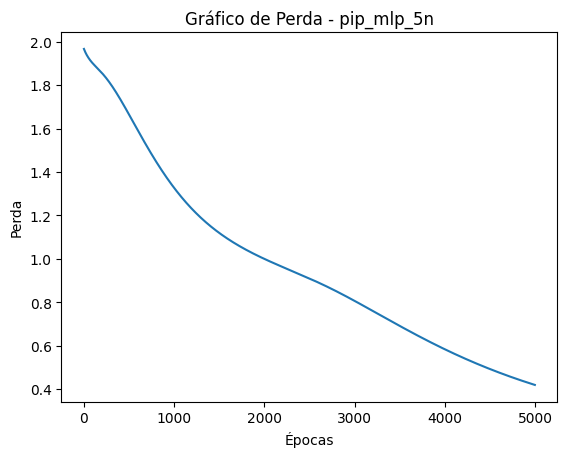

In [21]:
plot_loss_curve('pip_mlp_5n', pip_mlp_5n.named_steps['mlp_5n'].loss_curve_)

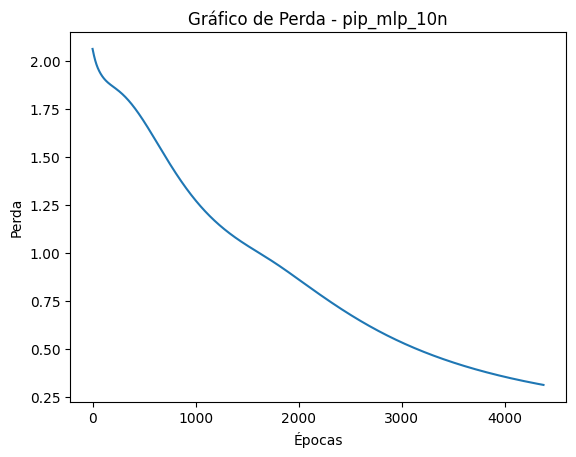

In [22]:
plot_loss_curve('pip_mlp_10n', pip_mlp_10n.named_steps['mlp_10n'].loss_curve_)

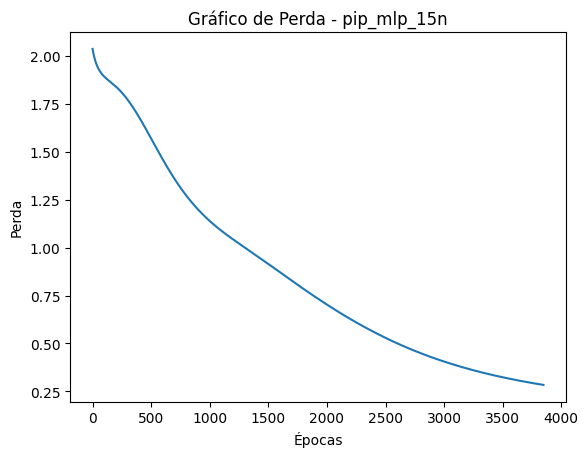

In [23]:
plot_loss_curve('pip_mlp_15n', pip_mlp_15n.named_steps['mlp_15n'].loss_curve_)

In [48]:
# Validação do melhor modelo (pip_mlp_15n) com as amostras de teste
y_pred = pip_mlp_15n.predict(X_test)

print("Acurácia: ", accuracy_score(Y_test, y_pred))
print("Precisão: ", precision_score(Y_test, y_pred, average='micro'))
print(classification_report(Y_test, y_pred, target_names=['Tipo A', 'Tipo B', 'Tipo C']))

Acurácia:  1.0
Precisão:  1.0
              precision    recall  f1-score   support

      Tipo A       1.00      1.00      1.00         6
      Tipo B       1.00      1.00      1.00         5
      Tipo C       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18
 samples avg       1.00      1.00      1.00        18



In [49]:
y_pred

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])